In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wn
import datetime
wn.filterwarnings("ignore")

In [2]:
flight=pd.read_csv(r"flights.csv")
hotel=pd.read_csv(r"hotels.csv")
user=pd.read_csv(r"users.csv")

In [3]:
#Exploratory Data Analysis

In [4]:
#UsersDataset

In [5]:
user.head()

,code,company,name,gender,age
0,0,4You,Roy Braun,male,21
1,1,4You,Joseph Holsten,male,37
2,2,4You,Wilma Mcinnis,female,48
3,3,4You,Paula Daniel,female,23
4,4,4You,Patricia Carson,female,44


In [6]:
user.columns

Index(['code', 'company', 'name', 'gender', 'age'], dtype='object')

In [7]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   code     1340 non-null   int64 
 1   company  1340 non-null   object
 2   name     1340 non-null   object
 3   gender   1340 non-null   object
 4   age      1340 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 52.5+ KB


In [8]:
user.shape

(1340, 5)

In [9]:
user.isna().sum()

code       0
company    0
name       0
gender     0
age        0
dtype: int64

In [10]:
user.duplicated().sum()

0

In [11]:
user.dtypes

code        int64
company    object
name       object
gender     object
age         int64
dtype: object

array([[<AxesSubplot:title={'center':'code'}>,
        <AxesSubplot:title={'center':'age'}>]], dtype=object)

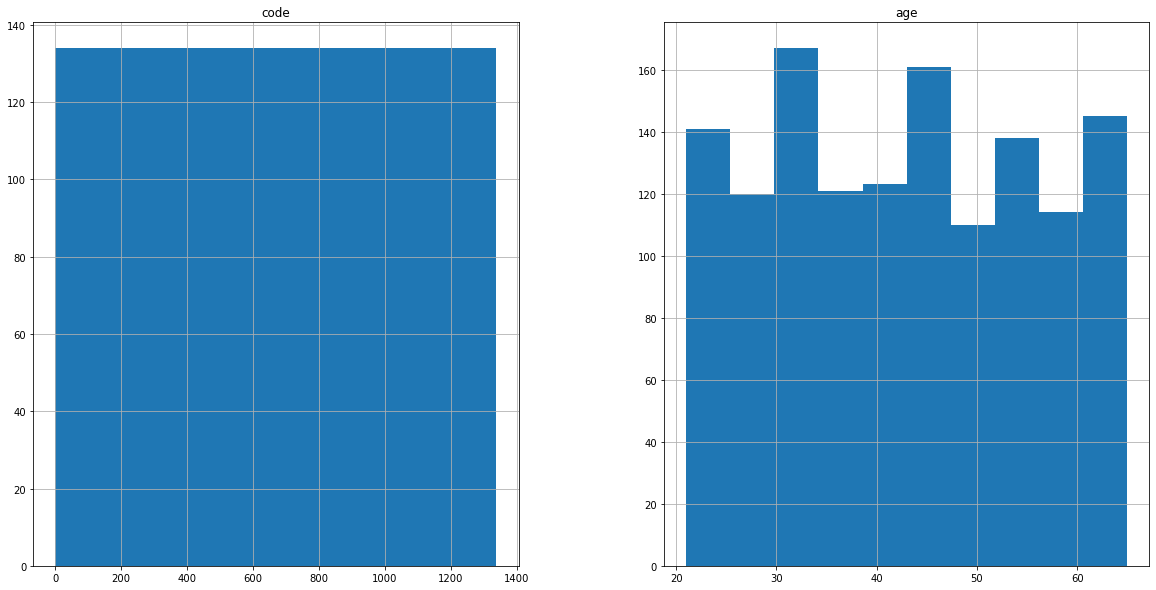

In [12]:
num=user.select_dtypes(include=['int'])
num.hist(figsize=(20,10))

In [13]:
user['name'].nunique()

1338

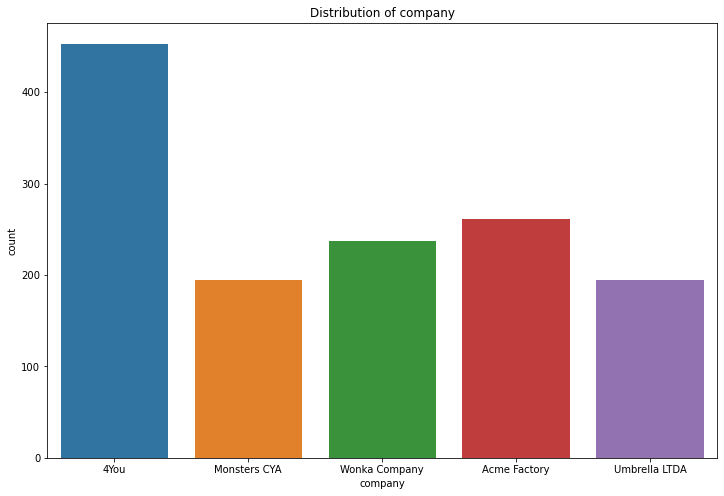

<Figure size 864x576 with 0 Axes>

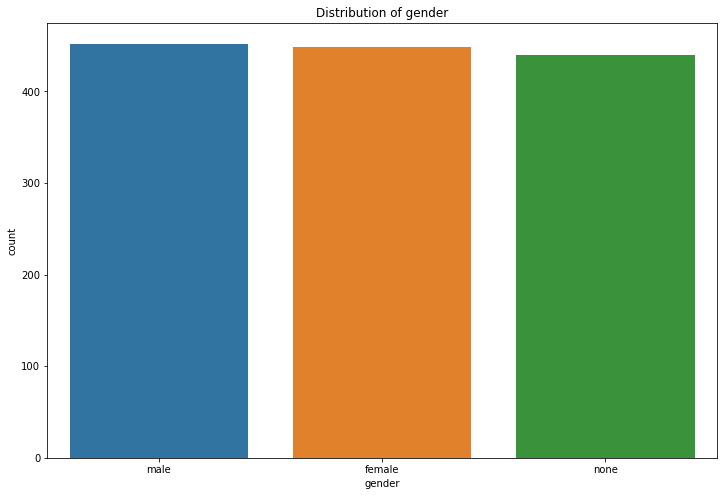

In [14]:
char=user.select_dtypes(include=['object'])

for i in char:
    plt.figure(figsize=(12,8))
    if user[i].nunique()<50:
        sns.countplot(user[i])
        plt.title('Distribution of {}'.format(i))
        plt.show()
    else:
        continue
            

In [15]:
#HotelDataset

In [16]:
hotel.head()

,travelCode,userCode,name,place,days,price,total,date
0,0,0,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019
1,2,0,Hotel K,Salvador (BH),2,263.41,526.82,10/10/2019
2,7,0,Hotel K,Salvador (BH),3,263.41,790.23,11/14/2019
3,11,0,Hotel K,Salvador (BH),4,263.41,1053.64,12/12/2019
4,13,0,Hotel A,Florianopolis (SC),1,313.02,313.02,12/26/2019


In [17]:
hotel.dtypes

travelCode      int64
userCode        int64
name           object
place          object
days            int64
price         float64
total         float64
date           object
dtype: object

In [18]:
hotel.shape

(40552, 8)

In [19]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40552 entries, 0 to 40551
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   travelCode  40552 non-null  int64  
 1   userCode    40552 non-null  int64  
 2   name        40552 non-null  object 
 3   place       40552 non-null  object 
 4   days        40552 non-null  int64  
 5   price       40552 non-null  float64
 6   total       40552 non-null  float64
 7   date        40552 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 2.5+ MB


In [20]:
hotel.isna().sum()

travelCode    0
userCode      0
name          0
place         0
days          0
price         0
total         0
date          0
dtype: int64

In [21]:
hotel.duplicated().sum()

0

In [22]:
hotel['date']=pd.to_datetime(hotel['date'])
hotel['year']=hotel['date'].apply(lambda x:x.year)
hotel['month']=hotel['date'].apply(lambda x:x.month)
hotel['day']=hotel['date'].apply(lambda x:x.day)
hotel['dayofWeek']=hotel['date'].apply(lambda x:x.dayofweek)
hotel['isWeekend']=hotel['dayofWeek'].apply(lambda x:1 if x>4 else 0)
hotel.dtypes

travelCode             int64
userCode               int64
name                  object
place                 object
days                   int64
price                float64
total                float64
date          datetime64[ns]
year                   int64
month                  int64
day                    int64
dayofWeek              int64
isWeekend              int64
dtype: object

In [23]:
hotel.head()

,travelCode,userCode,name,place,days,price,total,date,year,month,day,dayofWeek,isWeekend
0,0,0,Hotel A,Florianopolis (SC),4,313.02,1252.08,2019-09-26,2019,9,26,3,0
1,2,0,Hotel K,Salvador (BH),2,263.41,526.82,2019-10-10,2019,10,10,3,0
2,7,0,Hotel K,Salvador (BH),3,263.41,790.23,2019-11-14,2019,11,14,3,0
3,11,0,Hotel K,Salvador (BH),4,263.41,1053.64,2019-12-12,2019,12,12,3,0
4,13,0,Hotel A,Florianopolis (SC),1,313.02,313.02,2019-12-26,2019,12,26,3,0


In [24]:
hotel.nunique()

travelCode    40552
userCode       1310
name              9
place             9
days              4
price             9
total            36
date            199
year              5
month            12
day              31
dayofWeek         1
isWeekend         1
dtype: int64

In [25]:
hotel.dtypes

travelCode             int64
userCode               int64
name                  object
place                 object
days                   int64
price                float64
total                float64
date          datetime64[ns]
year                   int64
month                  int64
day                    int64
dayofWeek              int64
isWeekend              int64
dtype: object

array([[<AxesSubplot:title={'center':'travelCode'}>,
        <AxesSubplot:title={'center':'userCode'}>,
        <AxesSubplot:title={'center':'days'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'total'}>,
        <AxesSubplot:title={'center':'date'}>],
       [<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'dayofWeek'}>,
        <AxesSubplot:title={'center':'isWeekend'}>, <AxesSubplot:>]],
      dtype=object)

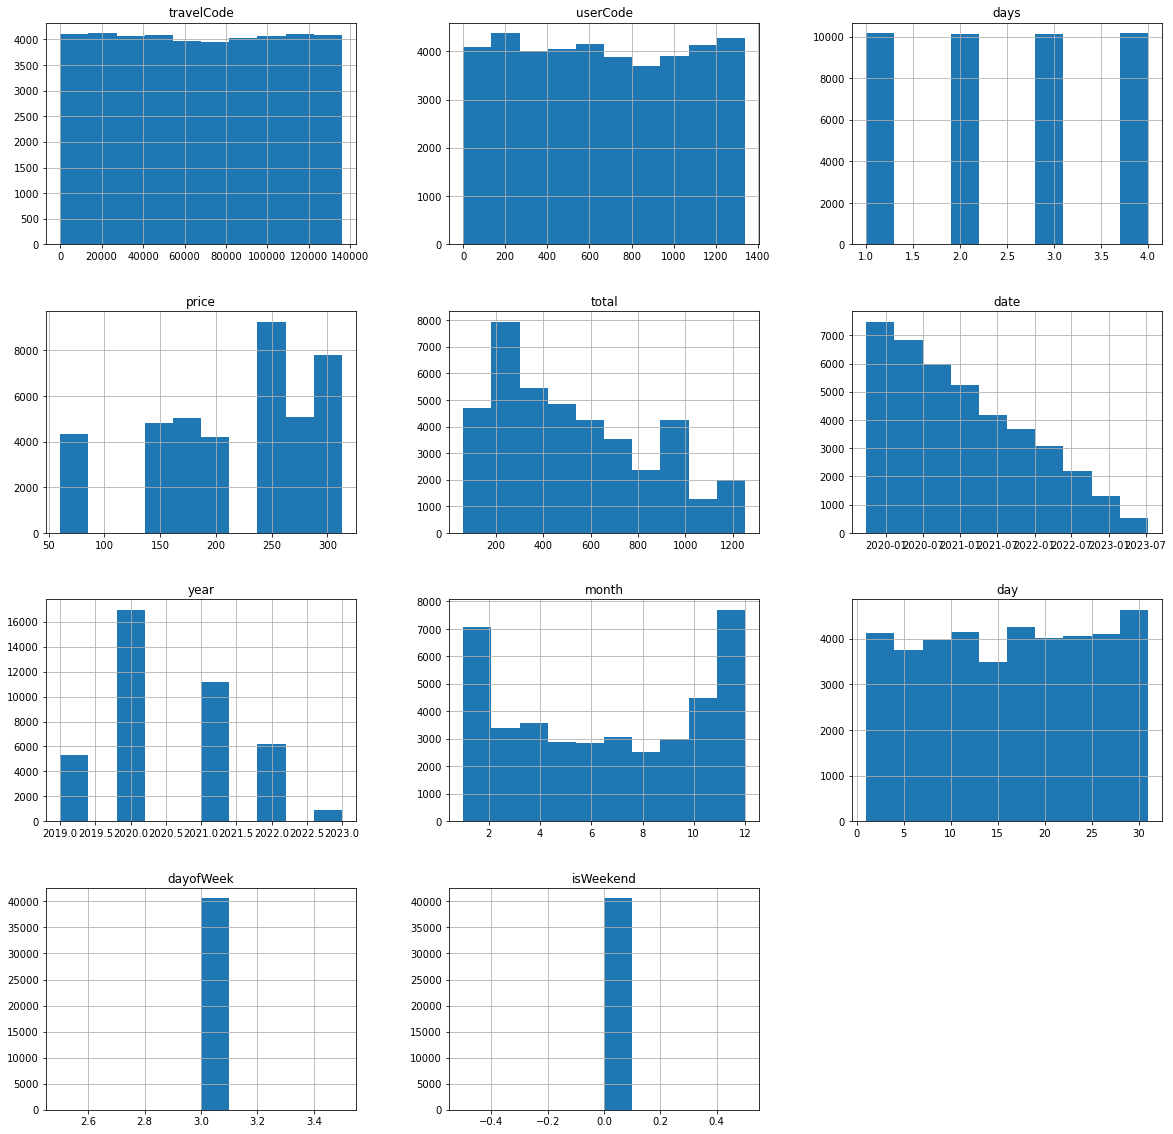

In [26]:
num=hotel.select_dtypes(include=['int','float','datetime'])
num.hist(figsize=(20,20))

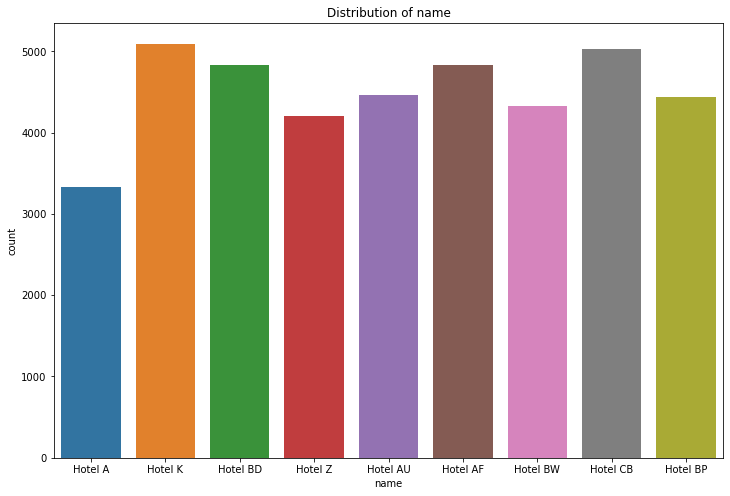

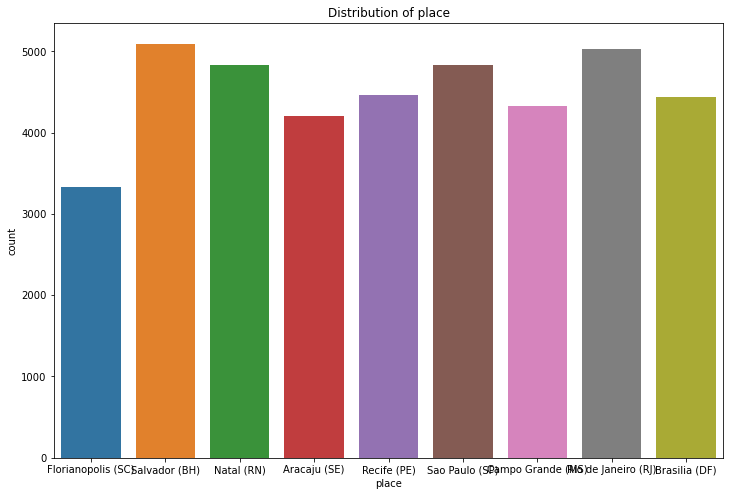

In [27]:
char=hotel.select_dtypes(include=['object'])

for i in char:
    plt.figure(figsize=(12,8))
    sns.countplot(hotel[i])
    plt.title('Distribution of {}'.format(i))
    plt.show()
   

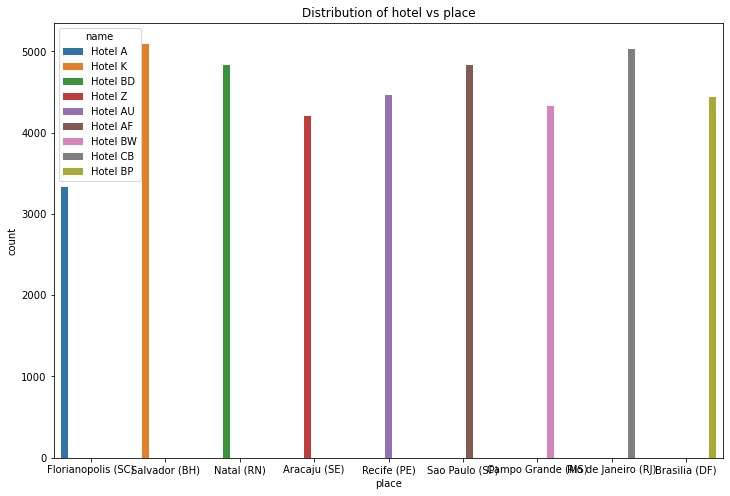

In [28]:
plt.figure(figsize=(12,8))
sns.countplot(x='place',hue='name',data=hotel)
plt.title('Distribution of hotel vs place')
plt.show()

In [29]:
hotel.columns

Index(['travelCode', 'userCode', 'name', 'place', 'days', 'price', 'total',
       'date', 'year', 'month', 'day', 'dayofWeek', 'isWeekend'],
      dtype='object')

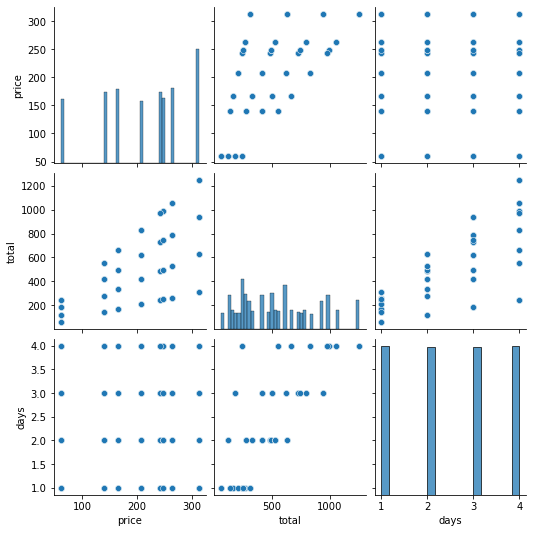

In [30]:
sli=hotel[['price','total','days']]
sns.pairplot(sli)

In [31]:
#FlightDataset

In [32]:
flight.head()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019


In [33]:
flight.shape

(271888, 10)

In [34]:
flight.dtypes

travelCode      int64
userCode        int64
from           object
to             object
flightType     object
price         float64
time          float64
distance      float64
agency         object
date           object
dtype: object

In [35]:
flight.isna().sum()

travelCode    0
userCode      0
from          0
to            0
flightType    0
price         0
time          0
distance      0
agency        0
date          0
dtype: int64

In [36]:
flight.duplicated().sum()

0

In [37]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271888 entries, 0 to 271887
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   travelCode  271888 non-null  int64  
 1   userCode    271888 non-null  int64  
 2   from        271888 non-null  object 
 3   to          271888 non-null  object 
 4   flightType  271888 non-null  object 
 5   price       271888 non-null  float64
 6   time        271888 non-null  float64
 7   distance    271888 non-null  float64
 8   agency      271888 non-null  object 
 9   date        271888 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 20.7+ MB


In [38]:
flight['date']=pd.to_datetime(flight['date'], format='%m/%d/%Y')
flight['year']=flight['date'].apply(lambda x:x.year)
flight['month']=flight['date'].apply(lambda x:x.month)
flight['day']=flight['date'].apply(lambda x:x.day)
flight['dayofWeek']=flight['date'].apply(lambda x:x.dayofweek)
flight['isWeekend']=flight['dayofWeek'].apply(lambda x:1 if x>4 else 0)
flight.dtypes

travelCode             int64
userCode               int64
from                  object
to                    object
flightType            object
price                float64
time                 float64
distance             float64
agency                object
date          datetime64[ns]
year                   int64
month                  int64
day                    int64
dayofWeek              int64
isWeekend              int64
dtype: object

In [39]:
flight.head()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date,year,month,day,dayofWeek,isWeekend
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,2019-09-26,2019,9,26,3,0
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,2019-09-30,2019,9,30,0,0
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,2019-10-03,2019,10,3,3,0
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,2019-10-04,2019,10,4,4,0
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,2019-10-10,2019,10,10,3,0


Text(0.5, 0, 'date')

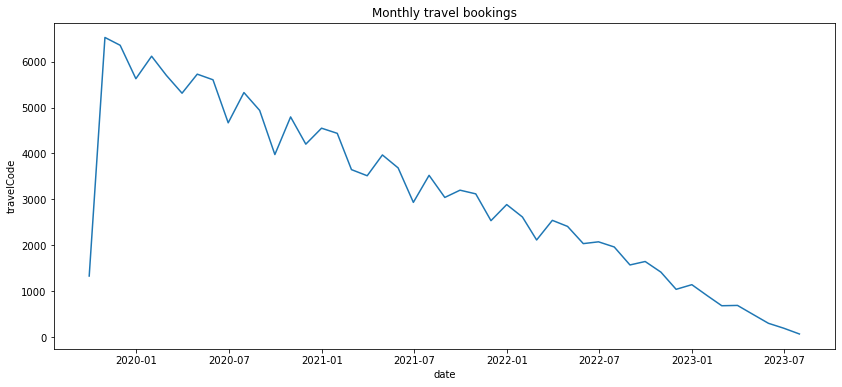

In [40]:
flight_booking=flight.copy()
flight_booking.set_index('date', inplace=True)
bookings = flight_booking.resample('1m').nunique()['travelCode']
plt.figure(figsize=(14,6))
plt.title("Monthly travel bookings")
sns.lineplot(data=bookings)
plt.xlabel(bookings.index.name)

In [41]:
flight.nunique()

travelCode    135944
userCode        1335
from               9
to                 9
flightType         3
price            490
time              33
distance          35
agency             3
date             999
year               5
month             12
day               31
dayofWeek          5
isWeekend          2
dtype: int64

In [42]:
flight.dtypes

travelCode             int64
userCode               int64
from                  object
to                    object
flightType            object
price                float64
time                 float64
distance             float64
agency                object
date          datetime64[ns]
year                   int64
month                  int64
day                    int64
dayofWeek              int64
isWeekend              int64
dtype: object

array([[<AxesSubplot:title={'center':'travelCode'}>,
        <AxesSubplot:title={'center':'userCode'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'time'}>,
        <AxesSubplot:title={'center':'distance'}>,
        <AxesSubplot:title={'center':'date'}>],
       [<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'dayofWeek'}>,
        <AxesSubplot:title={'center':'isWeekend'}>, <AxesSubplot:>]],
      dtype=object)

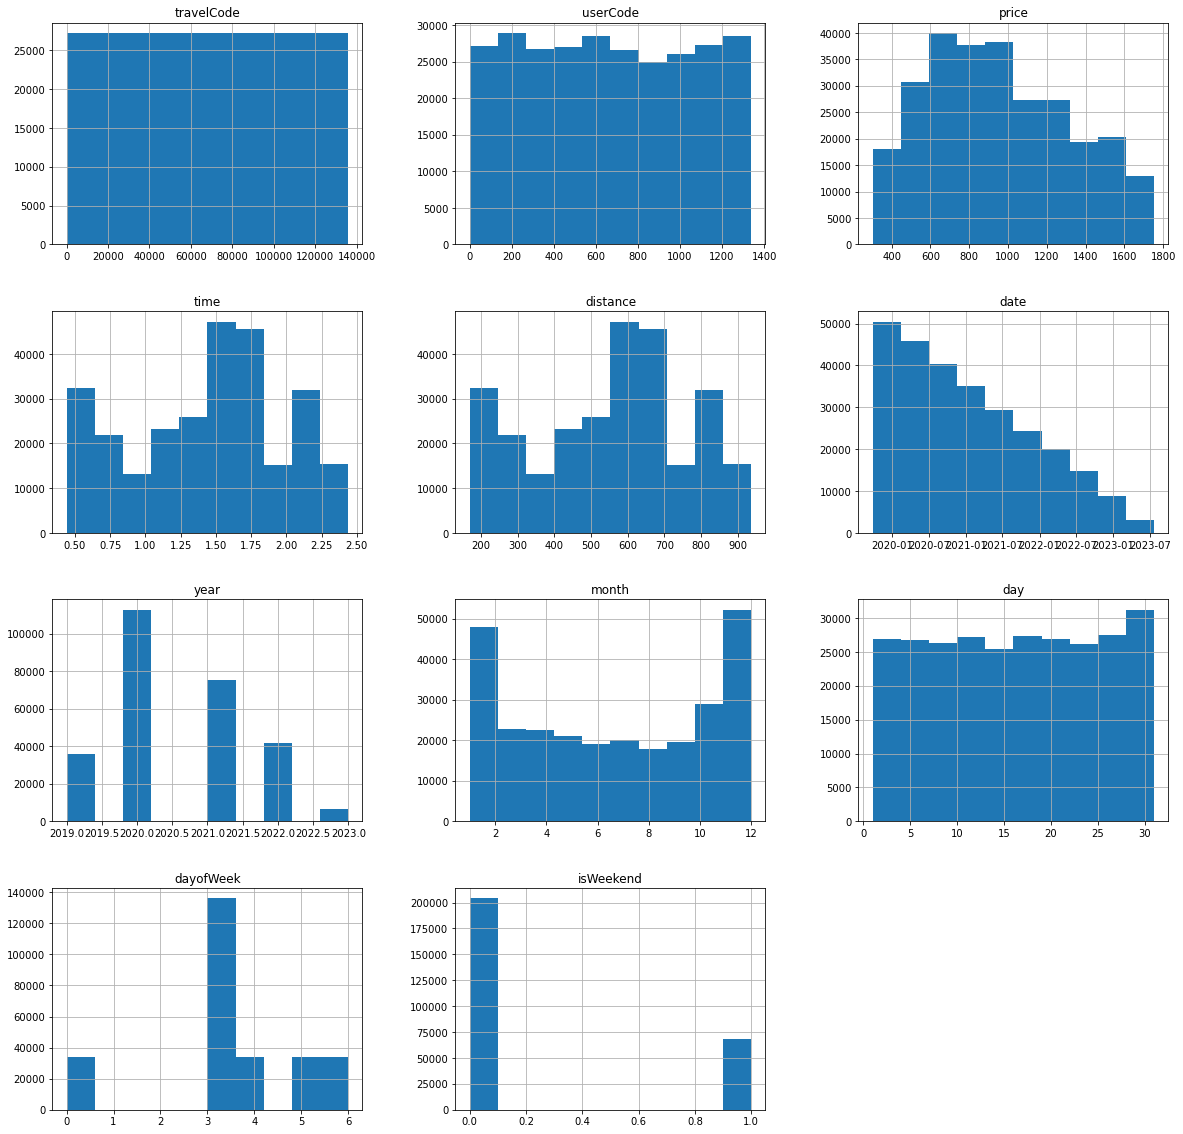

In [43]:
num=flight.select_dtypes(include=['int','float','datetime'])
num.hist(figsize=(20,20))

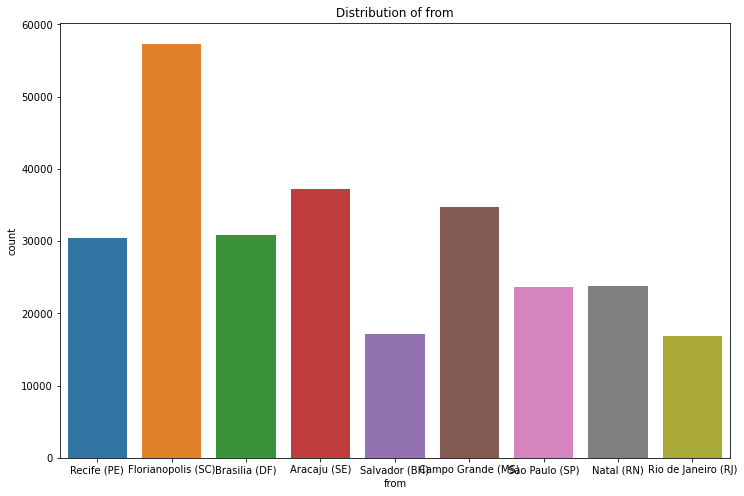

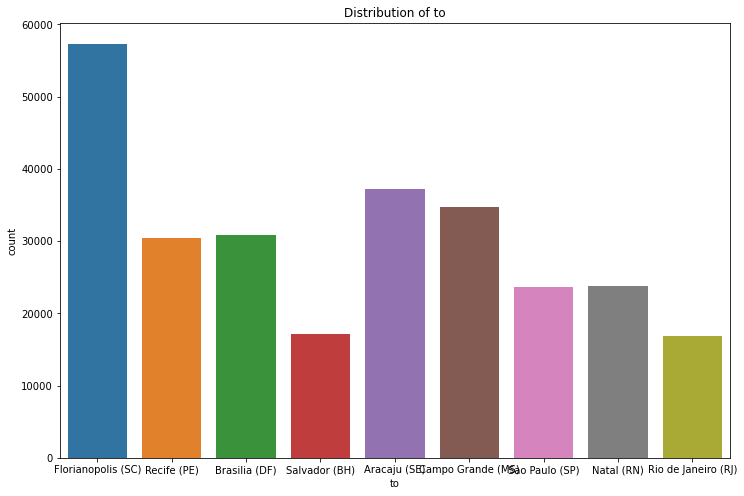

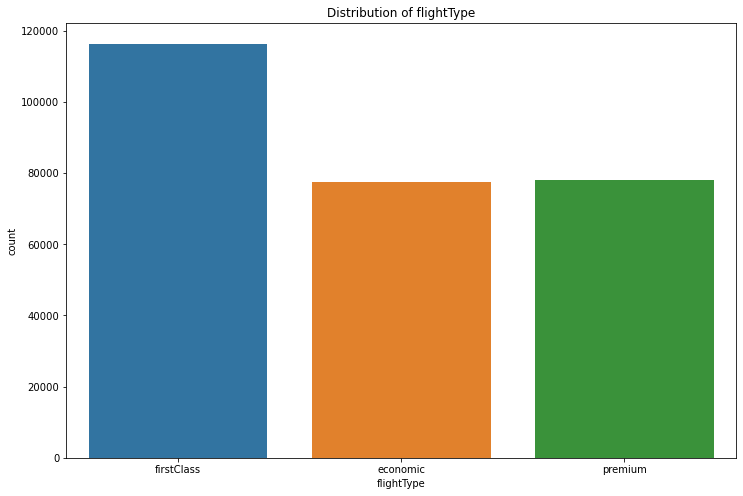

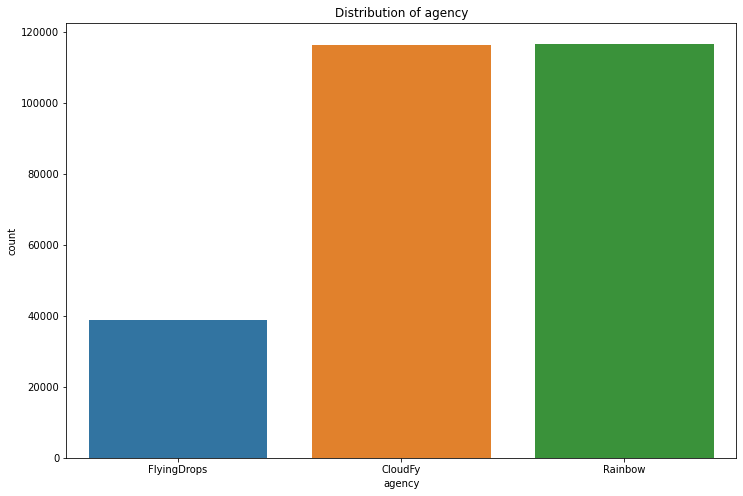

In [44]:
char=flight.select_dtypes(include=['object'])

for i in char:
    plt.figure(figsize=(12,8))
    sns.countplot(flight[i])
    plt.title('Distribution of {}'.format(i))
    plt.show()
   

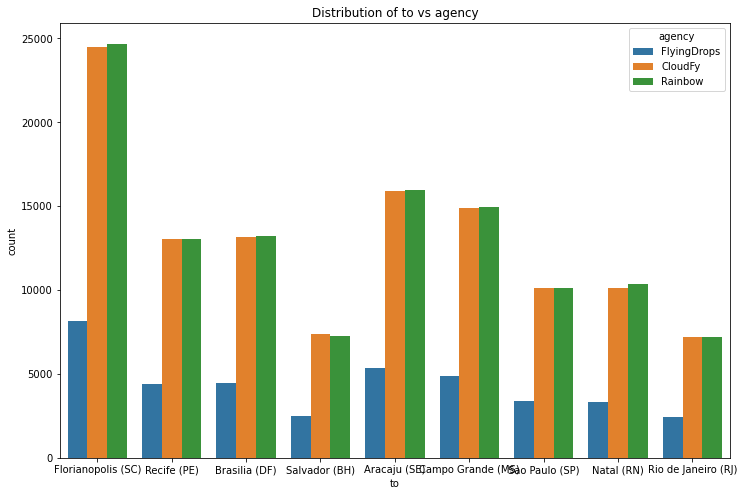

In [45]:
plt.figure(figsize=(12,8))
sns.countplot(x='to',hue='agency',data=flight)
plt.title('Distribution of to vs agency')
plt.show()

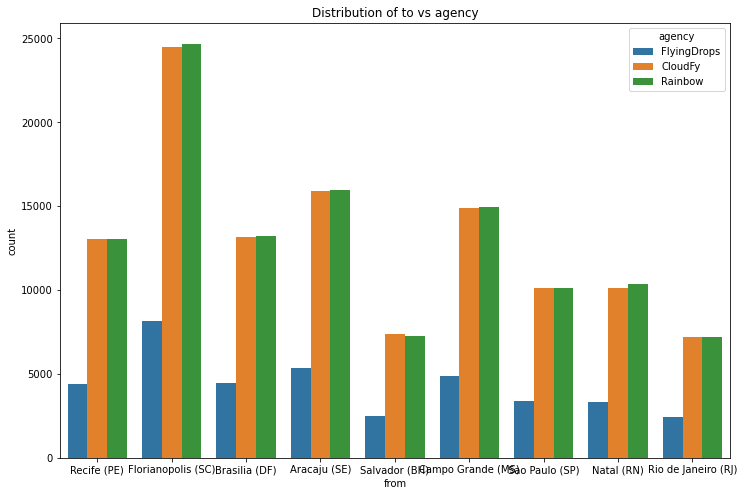

In [46]:
plt.figure(figsize=(12,8))
sns.countplot(x='from',hue='agency',data=flight)
plt.title('Distribution of to vs agency')
plt.show()

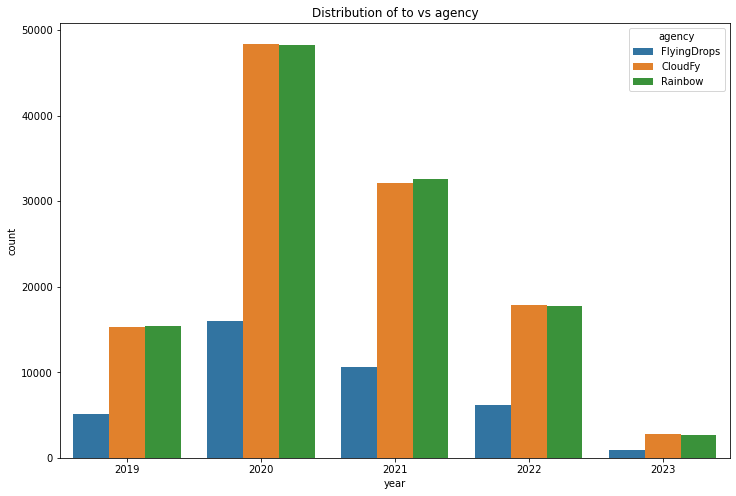

In [47]:
plt.figure(figsize=(12,8))
sns.countplot(x='year',hue='agency',data=flight)
plt.title('Distribution of to vs agency')
plt.show()

In [48]:
flight.columns

Index(['travelCode', 'userCode', 'from', 'to', 'flightType', 'price', 'time',
       'distance', 'agency', 'date', 'year', 'month', 'day', 'dayofWeek',
       'isWeekend'],
      dtype='object')

flight_slice=flight[['price', 'time',
       'distance', 'agency', 'date', 'year', 'month', 'day', 'dayofWeek',
       'isWeekend']]
sns.pairplot(flight_slice)

In [49]:
# Combining the dataset 

In [50]:
#All the flights taken are roundabout and its given seperately

In [51]:
flight.head()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date,year,month,day,dayofWeek,isWeekend
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,2019-09-26,2019,9,26,3,0
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,2019-09-30,2019,9,30,0,0
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,2019-10-03,2019,10,3,3,0
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,2019-10-04,2019,10,4,4,0
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,2019-10-10,2019,10,10,3,0


In [52]:
df_flight_combine = flight
df_flight_combine['price_return'] = (df_flight_combine.groupby(['travelCode','userCode'])['price'].shift(-1))
df_flight_combine['date_return'] = (df_flight_combine.groupby(['travelCode','userCode'])['date'].shift(-1))

In [53]:
df_flight_combine.head()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date,year,month,day,dayofWeek,isWeekend,price_return,date_return
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,2019-09-26,2019,9,26,3,0,1292.29,2019-09-30
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,2019-09-30,2019,9,30,0,0,NaN,NaT
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,2019-10-03,2019,10,3,3,0,1127.36,2019-10-04
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,2019-10-04,2019,10,4,4,0,NaN,NaT
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,2019-10-10,2019,10,10,3,0,1531.92,2019-10-12


In [54]:
# Drop one of the combined columns
df_flight_combine = df_flight_combine.dropna(how='any',axis=0)

In [55]:
df_flight_combine.head()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date,year,month,day,dayofWeek,isWeekend,price_return,date_return
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,2019-09-26,2019,9,26,3,0,1292.29,2019-09-30
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,2019-10-03,2019,10,3,3,0,1127.36,2019-10-04
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,2019-10-10,2019,10,10,3,0,1531.92,2019-10-12
6,3,0,Aracaju (SE),Campo Grande (MS),economic,743.54,1.69,650.10,Rainbow,2019-10-17,2019,10,17,3,0,877.56,2019-10-20
8,4,0,Recife (PE),Florianopolis (SC),economic,803.39,1.76,676.53,Rainbow,2019-10-24,2019,10,24,3,0,695.30,2019-10-26


In [56]:
df_flight_combine.dtypes

travelCode               int64
userCode                 int64
from                    object
to                      object
flightType              object
price                  float64
time                   float64
distance               float64
agency                  object
date            datetime64[ns]
year                     int64
month                    int64
day                      int64
dayofWeek                int64
isWeekend                int64
price_return           float64
date_return     datetime64[ns]
dtype: object

In [57]:
# Calculate travel date
df_flight_combine['travel_day'] = df_flight_combine.date_return - df_flight_combine.date

In [58]:
# Extract integer from travel date
df_flight_combine['travel_day'] = df_flight_combine['travel_day'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

In [59]:
df_flight_combine.head()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date,year,month,day,dayofWeek,isWeekend,price_return,date_return,travel_day
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,2019-09-26,2019,9,26,3,0,1292.29,2019-09-30,4
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,2019-10-03,2019,10,3,3,0,1127.36,2019-10-04,1
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,2019-10-10,2019,10,10,3,0,1531.92,2019-10-12,2
6,3,0,Aracaju (SE),Campo Grande (MS),economic,743.54,1.69,650.10,Rainbow,2019-10-17,2019,10,17,3,0,877.56,2019-10-20,3
8,4,0,Recife (PE),Florianopolis (SC),economic,803.39,1.76,676.53,Rainbow,2019-10-24,2019,10,24,3,0,695.30,2019-10-26,2


In [60]:
df_flight_combine.shape

(135944, 18)

In [61]:
df_flight_combine.dtypes

travelCode               int64
userCode                 int64
from                    object
to                      object
flightType              object
price                  float64
time                   float64
distance               float64
agency                  object
date            datetime64[ns]
year                     int64
month                    int64
day                      int64
dayofWeek                int64
isWeekend                int64
price_return           float64
date_return     datetime64[ns]
travel_day               int32
dtype: object

In [62]:
hotel.dtypes

travelCode             int64
userCode               int64
name                  object
place                 object
days                   int64
price                float64
total                float64
date          datetime64[ns]
year                   int64
month                  int64
day                    int64
dayofWeek              int64
isWeekend              int64
dtype: object

In [63]:
flight_hotel=pd.merge(df_flight_combine,hotel, on = ('userCode','travelCode'), how='left')

In [64]:
flight_hotel.head()

,travelCode,userCode,from,to,flightType,price_x,time,distance,agency,date_x,...,place,days,price_y,total,date_y,year_y,month_y,day_y,dayofWeek_y,isWeekend_y
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,2019-09-26,...,Florianopolis (SC),4.0,313.02,1252.08,2019-09-26,2019.0,9.0,26.0,3.0,0.0
1,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,2019-10-03,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
2,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,2019-10-10,...,Salvador (BH),2.0,263.41,526.82,2019-10-10,2019.0,10.0,10.0,3.0,0.0
3,3,0,Aracaju (SE),Campo Grande (MS),economic,743.54,1.69,650.10,Rainbow,2019-10-17,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
4,4,0,Recife (PE),Florianopolis (SC),economic,803.39,1.76,676.53,Rainbow,2019-10-24,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [65]:
flight_hotel.shape

(135944, 29)

In [66]:
flight_hotel.columns

Index(['travelCode', 'userCode', 'from', 'to', 'flightType', 'price_x', 'time',
       'distance', 'agency', 'date_x', 'year_x', 'month_x', 'day_x',
       'dayofWeek_x', 'isWeekend_x', 'price_return', 'date_return',
       'travel_day', 'name', 'place', 'days', 'price_y', 'total', 'date_y',
       'year_y', 'month_y', 'day_y', 'dayofWeek_y', 'isWeekend_y'],
      dtype='object')

In [67]:
flight_hotel.rename(columns={'price_x': 'flight_price', 'date_x': 'flight_date', 'name': 'hotel_name', 'price_y':'hotel_price','days':'hotel_days','date_y':'hotel_date' },inplace=True)

In [68]:
flight_hotel.head()

,travelCode,userCode,from,to,flightType,flight_price,time,distance,agency,flight_date,...,place,hotel_days,hotel_price,total,hotel_date,year_y,month_y,day_y,dayofWeek_y,isWeekend_y
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,2019-09-26,...,Florianopolis (SC),4.0,313.02,1252.08,2019-09-26,2019.0,9.0,26.0,3.0,0.0
1,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,2019-10-03,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
2,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,2019-10-10,...,Salvador (BH),2.0,263.41,526.82,2019-10-10,2019.0,10.0,10.0,3.0,0.0
3,3,0,Aracaju (SE),Campo Grande (MS),economic,743.54,1.69,650.10,Rainbow,2019-10-17,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
4,4,0,Recife (PE),Florianopolis (SC),economic,803.39,1.76,676.53,Rainbow,2019-10-24,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [69]:
# Combine users andcombined flight_hotel  data
flight_hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135944 entries, 0 to 135943
Data columns (total 29 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   travelCode    135944 non-null  int64         
 1   userCode      135944 non-null  int64         
 2   from          135944 non-null  object        
 3   to            135944 non-null  object        
 4   flightType    135944 non-null  object        
 5   flight_price  135944 non-null  float64       
 6   time          135944 non-null  float64       
 7   distance      135944 non-null  float64       
 8   agency        135944 non-null  object        
 9   flight_date   135944 non-null  datetime64[ns]
 10  year_x        135944 non-null  int64         
 11  month_x       135944 non-null  int64         
 12  day_x         135944 non-null  int64         
 13  dayofWeek_x   135944 non-null  int64         
 14  isWeekend_x   135944 non-null  int64         
 15  price_return  135

In [70]:
user.rename(columns={'code':'userCode'},inplace=True)
user.columns

Index(['userCode', 'company', 'name', 'gender', 'age'], dtype='object')

In [71]:
flight_hotel.columns

Index(['travelCode', 'userCode', 'from', 'to', 'flightType', 'flight_price',
       'time', 'distance', 'agency', 'flight_date', 'year_x', 'month_x',
       'day_x', 'dayofWeek_x', 'isWeekend_x', 'price_return', 'date_return',
       'travel_day', 'hotel_name', 'place', 'hotel_days', 'hotel_price',
       'total', 'hotel_date', 'year_y', 'month_y', 'day_y', 'dayofWeek_y',
       'isWeekend_y'],
      dtype='object')

In [72]:
data=pd.merge(user,flight_hotel, on = 'userCode', how='right')

In [73]:
data.head()

,userCode,company,name,gender,age,travelCode,from,to,flightType,flight_price,...,place,hotel_days,hotel_price,total,hotel_date,year_y,month_y,day_y,dayofWeek_y,isWeekend_y
0,0,4You,Roy Braun,male,21,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,...,Florianopolis (SC),4.0,313.02,1252.08,2019-09-26,2019.0,9.0,26.0,3.0,0.0
1,0,4You,Roy Braun,male,21,1,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
2,0,4You,Roy Braun,male,21,2,Aracaju (SE),Salvador (BH),firstClass,1684.05,...,Salvador (BH),2.0,263.41,526.82,2019-10-10,2019.0,10.0,10.0,3.0,0.0
3,0,4You,Roy Braun,male,21,3,Aracaju (SE),Campo Grande (MS),economic,743.54,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
4,0,4You,Roy Braun,male,21,4,Recife (PE),Florianopolis (SC),economic,803.39,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [74]:
data.shape

(135944, 33)

In [75]:
data.columns

Index(['userCode', 'company', 'name', 'gender', 'age', 'travelCode', 'from',
       'to', 'flightType', 'flight_price', 'time', 'distance', 'agency',
       'flight_date', 'year_x', 'month_x', 'day_x', 'dayofWeek_x',
       'isWeekend_x', 'price_return', 'date_return', 'travel_day',
       'hotel_name', 'place', 'hotel_days', 'hotel_price', 'total',
       'hotel_date', 'year_y', 'month_y', 'day_y', 'dayofWeek_y',
       'isWeekend_y'],
      dtype='object')

In [76]:
data.isna().sum()

userCode            0
company             0
name                0
gender              0
age                 0
travelCode          0
from                0
to                  0
flightType          0
flight_price        0
time                0
distance            0
agency              0
flight_date         0
year_x              0
month_x             0
day_x               0
dayofWeek_x         0
isWeekend_x         0
price_return        0
date_return         0
travel_day          0
hotel_name      95392
place           95392
hotel_days      95392
hotel_price     95392
total           95392
hotel_date      95392
year_y          95392
month_y         95392
day_y           95392
dayofWeek_y     95392
isWeekend_y     95392
dtype: int64

In [77]:
data.drop(['year_y','month_y','day_y','dayofWeek_y','isWeekend_y'],axis=1,inplace=True)

In [78]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135944 entries, 0 to 135943
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   userCode      135944 non-null  int64         
 1   company       135944 non-null  object        
 2   name          135944 non-null  object        
 3   gender        135944 non-null  object        
 4   age           135944 non-null  int64         
 5   travelCode    135944 non-null  int64         
 6   from          135944 non-null  object        
 7   to            135944 non-null  object        
 8   flightType    135944 non-null  object        
 9   flight_price  135944 non-null  float64       
 10  time          135944 non-null  float64       
 11  distance      135944 non-null  float64       
 12  agency        135944 non-null  object        
 13  flight_date   135944 non-null  datetime64[ns]
 14  year_x        135944 non-null  int64         
 15  month_x       135

In [79]:
# Merged the dataset and filled the null values 
num=data.select_dtypes(include='float')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'flight_price'),
  Text(1, 0, 'time'),
  Text(2, 0, 'distance'),
  Text(3, 0, 'price_return'),
  Text(4, 0, 'hotel_days'),
  Text(5, 0, 'hotel_price'),
  Text(6, 0, 'total')])

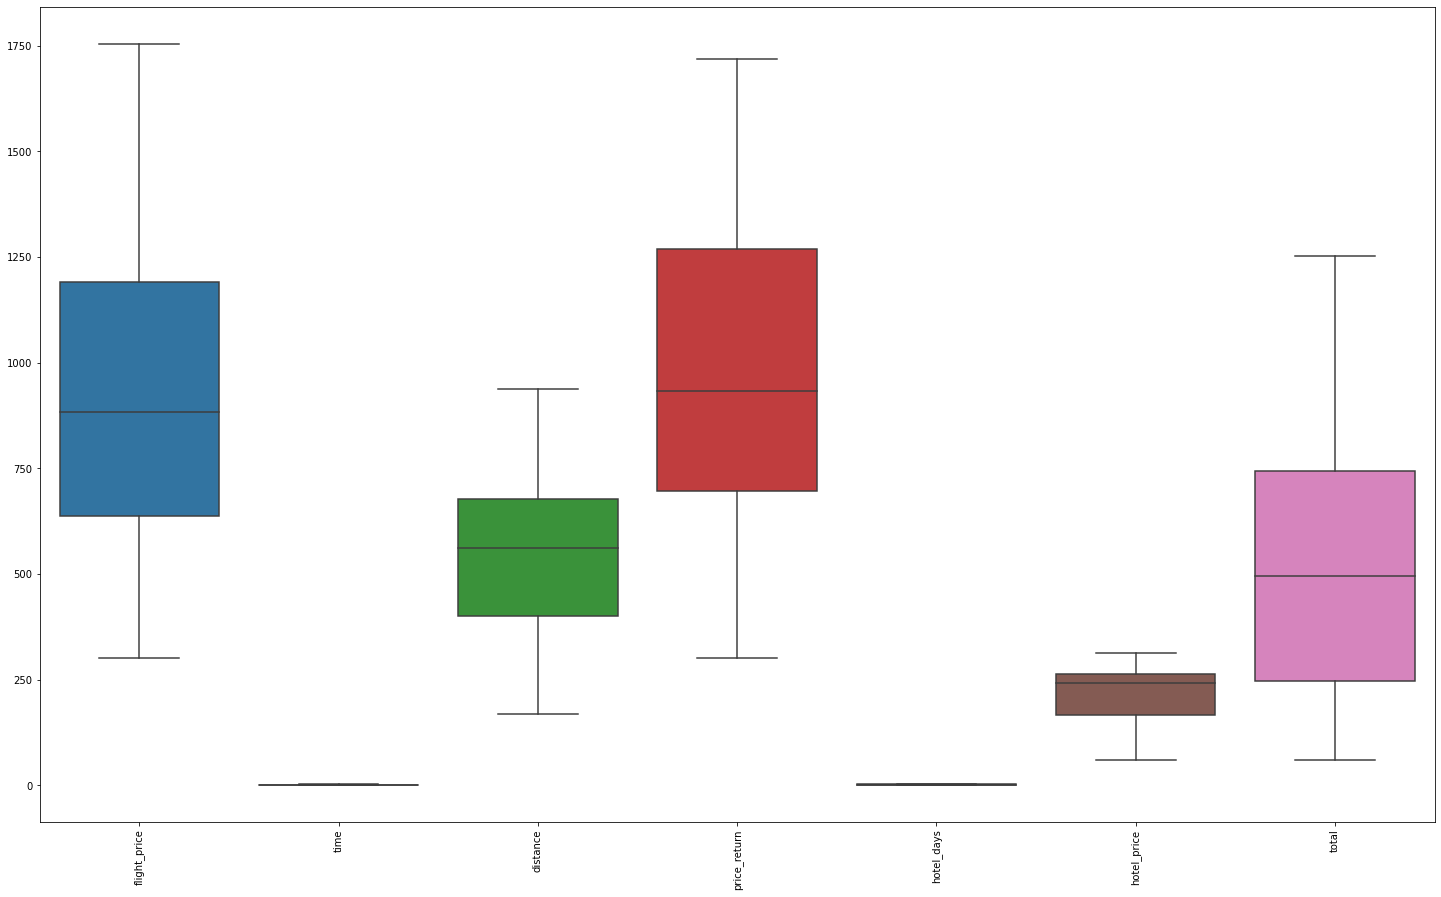

In [80]:
plt.figure(figsize=[25,15])
sns.boxplot(data=num )
plt.xticks(rotation=90)

In [81]:
##We should find that there is no outliers in this dataset before filling the NAN values

In [82]:
#FILLING THE NULL VALUES

In [83]:
data=data.dropna(axis=0)
# data['self_accommodation'] = 0
# data["hotel_name"].fillna("Unknown", inplace = True)
# data["place"].fillna("Unknown", inplace = True)
# data["hotel_price"].fillna(0.0, inplace = True)
# data["total"].fillna(0.0, inplace = True)
# data['hotel_days'].fillna(0, inplace = True)
# data['hotel_date'].fillna(0, inplace = True)
# data.loc[data['hotel_price'] ==0, 'self_accommodation'] = 1
data['total_price']=data['hotel_price']+data['flight_price']

In [84]:
data.isna().sum()

userCode        0
company         0
name            0
gender          0
age             0
travelCode      0
from            0
to              0
flightType      0
flight_price    0
time            0
distance        0
agency          0
flight_date     0
year_x          0
month_x         0
day_x           0
dayofWeek_x     0
isWeekend_x     0
price_return    0
date_return     0
travel_day      0
hotel_name      0
place           0
hotel_days      0
hotel_price     0
total           0
hotel_date      0
total_price     0
dtype: int64

In [85]:
data.dtypes

userCode                 int64
company                 object
name                    object
gender                  object
age                      int64
travelCode               int64
from                    object
to                      object
flightType              object
flight_price           float64
time                   float64
distance               float64
agency                  object
flight_date     datetime64[ns]
year_x                   int64
month_x                  int64
day_x                    int64
dayofWeek_x              int64
isWeekend_x              int64
price_return           float64
date_return     datetime64[ns]
travel_day               int32
hotel_name              object
place                   object
hotel_days             float64
hotel_price            float64
total                  float64
hotel_date      datetime64[ns]
total_price            float64
dtype: object

In [86]:
# data['self_accommodation'].value_counts()

In [87]:
data['hotel_name'].unique()

array(['Hotel A', 'Hotel K', 'Hotel BD', 'Hotel Z', 'Hotel AU',
       'Hotel AF', 'Hotel BW', 'Hotel CB', 'Hotel BP'], dtype=object)

In [88]:
# Merged the dataset and filled the null values 
num=data.select_dtypes(include='float')

In [89]:
#boplot
# box=data[[]]

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'flight_price'),
  Text(1, 0, 'time'),
  Text(2, 0, 'distance'),
  Text(3, 0, 'price_return'),
  Text(4, 0, 'hotel_days'),
  Text(5, 0, 'hotel_price'),
  Text(6, 0, 'total'),
  Text(7, 0, 'total_price')])

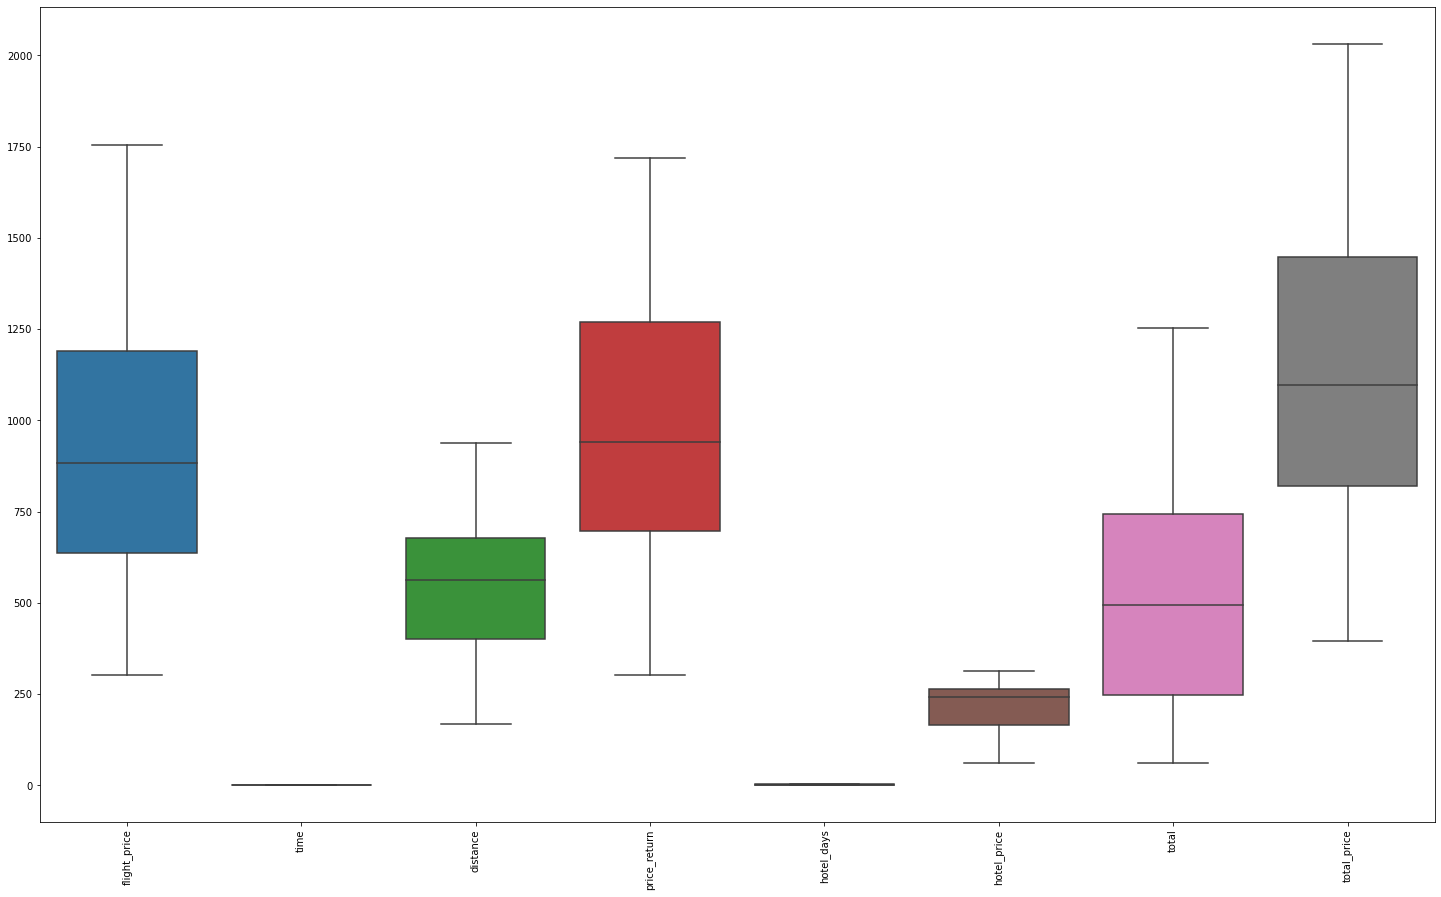

In [90]:
plt.figure(figsize=[25,15])
sns.boxplot(data=num )
plt.xticks(rotation=90)

In [91]:
# We should only see outliers only after filling the values. Hence we can ignore the outliers displayed in the boxplot

(array([10., 20., 30., 40., 50., 60., 70.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

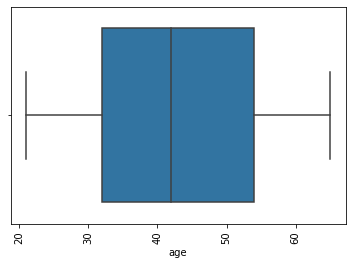

In [92]:
sns.boxplot(data['age'] )
plt.xticks(rotation=90)

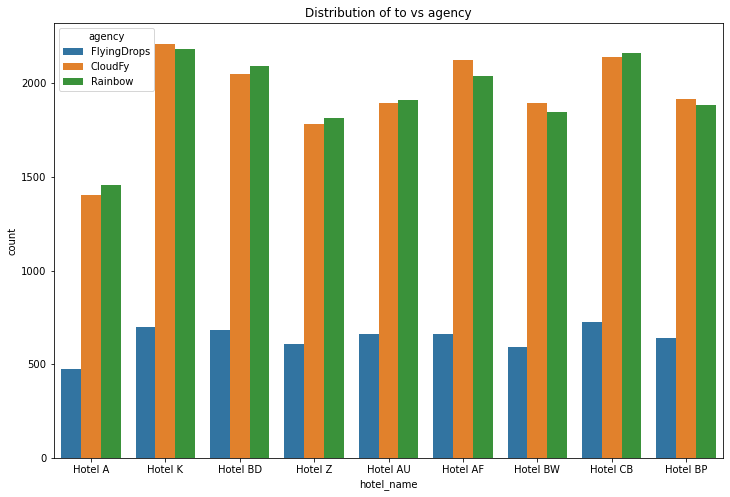

In [93]:
plt.figure(figsize=(12,8))
sns.countplot(x='hotel_name',hue='agency',data=data)
# sns.countplot(x='hotel_name',hue='agency',data=data[data['self_accommodation']==0])
plt.title('Distribution of to vs agency')
plt.show()

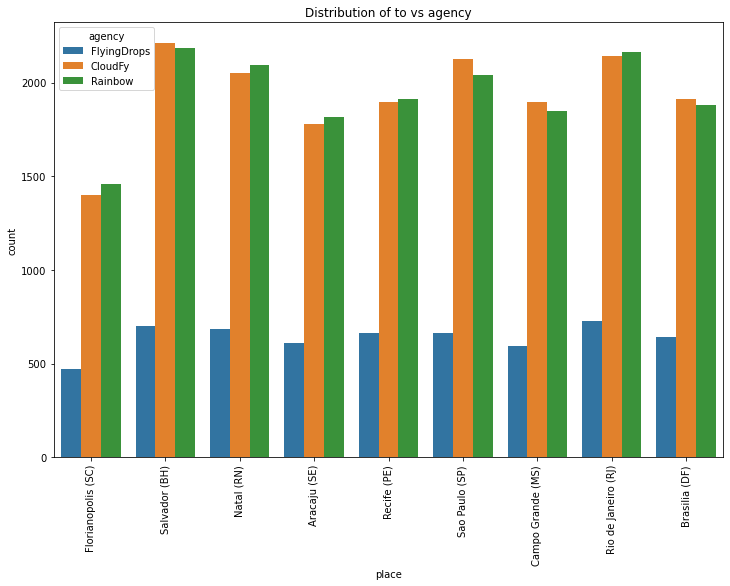

In [94]:
plt.figure(figsize=(12,8))
sns.countplot(x='place',hue='agency',data=data)
# sns.countplot(x='place',hue='agency',data=data[data['self_accommodation']==0])
plt.title('Distribution of to vs agency')
plt.xticks(rotation=90)
plt.show()

In [95]:
# The number of departing flights per agency
result = (data.groupby(['agency']).apply(lambda x: pd.Series({'Number of flights': len(x['from'])})).reset_index())
result

,agency,Number of flights
0,CloudFy,17410
1,FlyingDrops,5750
2,Rainbow,17392


In [96]:
# Most popular routes from origin airport in terms of flight price
ranking = (
    data
    # Compute volume per route
    .groupby(['from', 'to'])
    .apply(lambda x: pd.Series({
        'number of flights': len(x['flight_price'])
    }))
    .reset_index()
    # Computing rank within each origin airport and keep top ones
    .assign(
        rank_popular=lambda x:
            x.groupby(['from'])['number of flights'].rank(method='first', ascending=False)
    )
    [lambda x: x['rank_popular'] <= 3]
    .reset_index(drop=True)
    .drop(['number of flights'], axis=1)
    .assign(rank_popular=lambda x: 'top_' + x['rank_popular'].astype(int).map(str))
    # Reformating results
    .pivot_table(
        columns='rank_popular',
        values='to',
        index='from',
        aggfunc=np.sum
    )
    .rename_axis(None, axis=1)
    .reset_index()
)
ranking

,from,top_1,top_2,top_3
0,Aracaju (SE),Natal (RN),Campo Grande (MS),Recife (PE)
1,Brasilia (DF),Salvador (BH),Florianopolis (SC),Aracaju (SE)
2,Campo Grande (MS),Recife (PE),Sao Paulo (SP),Aracaju (SE)
3,Florianopolis (SC),Sao Paulo (SP),Salvador (BH),Aracaju (SE)
4,Natal (RN),Campo Grande (MS),Brasilia (DF),Rio de Janeiro (RJ)
5,Recife (PE),Florianopolis (SC),Rio de Janeiro (RJ),Sao Paulo (SP)
6,Sao Paulo (SP),Campo Grande (MS),Salvador (BH),Florianopolis (SC)


In [97]:
places=flight['to'].unique()
Avgpritime=pd.DataFrame()
for rec in places:
    df=flight[flight['from']==rec]
    for i in places:
        if i != rec:
            dfi=df[df['to']==i]
            Avgpritime = Avgpritime.append({
                'from':rec,
                'to':i,
                'price':dfi['price'].mean(),
                'time':dfi['time'].mean(),
                'distance':dfi['distance'].mean(),
                }, ignore_index = True)
        
Avgpritime=Avgpritime.dropna(how='any',axis=0)
Avgpritime['flight_path'] = Avgpritime.index
flight_path=Avgpritime.drop(['price','distance','time'], axis=1)
dfa = pd.merge(data, flight_path, on=('from','to'), how='inner')

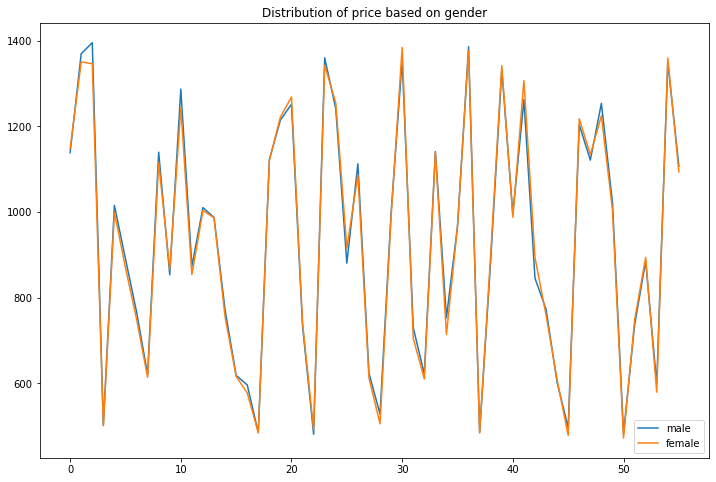

In [98]:
price_m=[]
price_f=[]
price_n=[]
difference=[]
for i in dfa['flight_path'].unique():
    df=dfa[dfa['flight_path']==i]
    price_m.append(df[df['gender']=='male']['flight_price'].mean())
    price_f.append(df[df['gender']=='female']['flight_price'].mean())
    price_n.append(df[df['gender']=='none']['flight_price'].mean())
    difference.append(df[df['gender']=='male']['flight_price'].mean()-df[df['gender']=='female']['flight_price'].mean())
    
plt.figure(figsize=(12,8))
sns.lineplot(data=price_m,label="male")
sns.lineplot(data=price_f,label = "female")
# sns.lineplot(data=price_n,label = "none")
plt.title('Distribution of price based on gender')
plt.show()

<AxesSubplot:title={'center':'Average price Vs distance'}, ylabel='price'>

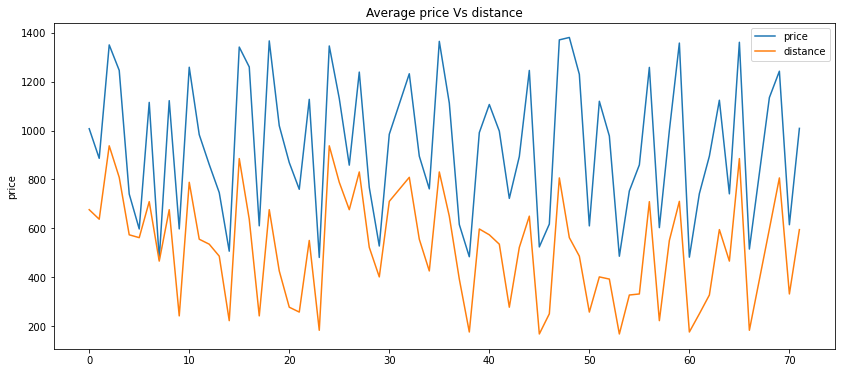

In [99]:
plt.figure(figsize=(14,6))
plt.title("Average price Vs distance")
sns.lineplot(data=Avgpritime['price'],label="price")
sns.lineplot(data=Avgpritime['distance'],label="distance")

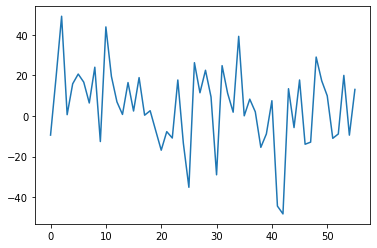

In [100]:
plt.plot(difference,label = "difference", linestyle="-")

In [101]:
hotel_grouped = (hotel.groupby(['place']).apply(lambda x: pd.Series({'hotel_price': x['price'].mean(),'hotel_name':x['name'].unique()[0]})).reset_index())
hotel_grouped.rename(columns={'place':'to'},inplace=True)
hotel_grouped

,to,hotel_price,hotel_name
0,Aracaju (SE),208.04,Hotel Z
1,Brasilia (DF),247.62,Hotel BP
2,Campo Grande (MS),60.39,Hotel BW
3,Florianopolis (SC),313.02,Hotel A
4,Natal (RN),242.88,Hotel BD
5,Recife (PE),312.83,Hotel AU
6,Rio de Janeiro (RJ),165.99,Hotel CB
7,Salvador (BH),263.41,Hotel K
8,Sao Paulo (SP),139.10,Hotel AF


In [102]:
flight['quarter'] = flight['date'].dt.quarter
places=flight['to'].unique()
plans=pd.DataFrame()
paths=pd.DataFrame()
for rec in places:
    df=flight[flight['from']==rec]
    for agency in flight['agency'].unique():
        for flighttype in flight['flightType'].unique():
            for quarter in flight['quarter'].unique():
                    for i in places:
                        if i != rec:
                            dfi=df[(df['to']==i) &  (df['flightType']==flighttype) & (df['agency']==agency)&(df['quarter']==quarter)]
                            plans = plans.append({
                                'from':rec,
                                'to':i,
                                'price':dfi['price'].mean(),
                                'time':dfi['time'].mean(),
                                'distance':dfi['distance'].mean(),
                                'agency':agency,
                                'flightType':flighttype,
                                'quarter':quarter
                                }, ignore_index = True)
for rec in places:
    df=flight[flight['from']==rec]
    for i in places:
        if i != rec:
            dfi=df[df['to']==i]
            paths = paths.append({
                'from':rec,
                'to':i,
                }, ignore_index = True)
paths=paths.dropna(how='any',axis=0)
paths['flight_path'] = paths.index
plans=plans.dropna(how='any',axis=0)
plans['flight_plans'] = plans.index
consolidate = pd.merge(plans, paths, on=('from','to'), how='inner')
consolidate = pd.merge(consolidate, hotel_grouped, on=('to'), how='inner')
flight_path=consolidate.drop(['price','distance','time','hotel_name','hotel_price'], axis=1)
data = pd.merge(data, flight_path, on=('from','to','agency','flightType'), how='inner')

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162208 entries, 0 to 162207
Data columns (total 32 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   userCode      162208 non-null  int64         
 1   company       162208 non-null  object        
 2   name          162208 non-null  object        
 3   gender        162208 non-null  object        
 4   age           162208 non-null  int64         
 5   travelCode    162208 non-null  int64         
 6   from          162208 non-null  object        
 7   to            162208 non-null  object        
 8   flightType    162208 non-null  object        
 9   flight_price  162208 non-null  float64       
 10  time          162208 non-null  float64       
 11  distance      162208 non-null  float64       
 12  agency        162208 non-null  object        
 13  flight_date   162208 non-null  datetime64[ns]
 14  year_x        162208 non-null  int64         
 15  month_x       162

In [103]:
df=data.copy()
df=df.drop(['place','company'], axis=1)
df=pd.get_dummies(df,prefix="HN",columns=["hotel_name"])
df=pd.get_dummies(df,prefix="flight_type",columns=["flightType"])
df=pd.get_dummies(df,prefix="agency",columns=["agency"])

In [104]:
df['from'] = df['from'].replace(['Florianopolis (SC)', 'Recife (PE)', 'Brasilia (DF)',
       'Salvador (BH)', 'Aracaju (SE)', 'Campo Grande (MS)',
       'Sao Paulo (SP)', 'Natal (RN)', 'Rio de Janeiro (RJ)'], [4,5,1,8,0,2,6,4,7]) 
df['to'] = df['to'].replace(['Florianopolis (SC)', 'Recife (PE)', 'Brasilia (DF)',
       'Salvador (BH)', 'Aracaju (SE)', 'Campo Grande (MS)',
       'Sao Paulo (SP)', 'Natal (RN)', 'Rio de Janeiro (RJ)'], [4,5,1,8,0,2,6,4,7]) 
df['gender'] = data['gender'].replace(['male', 'female','none'], [0,1,2])

In [105]:
# data=pd.get_dummies(data,prefix="From",columns=["from"])
# data['from'] = data['from'].replace(places['Location'], places['id'])
# df=pd.get_dummies(df,prefix="Destination",columns=["to"])
# data['to'] = data['to'].replace(places['Location'], places['id'])
# data=pd.get_dummies(data,prefix="genger",columns=["gender"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162208 entries, 0 to 162207
Data columns (total 42 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   userCode                162208 non-null  int64         
 1   name                    162208 non-null  object        
 2   gender                  162208 non-null  int64         
 3   age                     162208 non-null  int64         
 4   travelCode              162208 non-null  int64         
 5   from                    162208 non-null  int64         
 6   to                      162208 non-null  int64         
 7   flight_price            162208 non-null  float64       
 8   time                    162208 non-null  float64       
 9   distance                162208 non-null  float64       
 10  flight_date             162208 non-null  datetime64[ns]
 11  year_x                  162208 non-null  int64         
 12  month_x                 162208

In [106]:
# from sklearn.preprocessing import StandardScaler
# scalar = StandardScaler()
# dfs =data.drop(['userCode','name','hotel_date','flight_date','date_return'], axis = 1)
# scaled_data = scalar.fit_transform(dfs)
# scaled_data = pd.DataFrame(scaled_data, columns = dfs.columns)
# scaled_data.describe()

In [107]:
from sklearn.model_selection import train_test_split
dfs =df.drop(['userCode','name','hotel_date','flight_date','date_return'], axis = 1)
df_feature =dfs[['flight_path','total_price','travel_day','age','gender','quarter']].copy()
df_target = dfs['flight_plans']
X_train, X_test,Y_train,Y_test = train_test_split(df_feature,df_target, test_size = 0.1,train_size =0.9)

In [108]:
from sklearn.tree import DecisionTreeClassifier
DesTr = DecisionTreeClassifier(random_state=42)
DesTr.fit(X_train, Y_train)
DesTr_y_pred_train = DesTr.predict(X_train)
DesTr_y_pred_test = DesTr.predict(X_test)

In [109]:
from sklearn import metrics
print("DecisionTree Accuracy:",metrics.accuracy_score(Y_test, DesTr_y_pred_test))

DecisionTree Accuracy: 1.0


In [110]:
from sklearn.naive_bayes import GaussianNB
GausNB = GaussianNB()
GausNB.fit(X_train, Y_train)
GausNB_y_pred_train = GausNB.predict(X_train)
GausNB_y_pred_test = GausNB.predict(X_test)
print("GaussianNB Accuracy:",metrics.accuracy_score(Y_test, GausNB_y_pred_test))

GaussianNB Accuracy: 1.0


In [111]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=15)
KNN.fit(X_train, Y_train)
KNN_y_pred_train = KNN.predict(X_train)
KNN_y_pred_test=KNN.predict(X_test)
print("KNeighbors Accuracy:",metrics.accuracy_score(Y_test,KNN_y_pred_test))

KNeighbors Accuracy: 0.6009493865976203


In [112]:
# from sklearn.linear_model import SGDClassifier
# SGD = SGDClassifier(loss='modified_huber',shuffle=True,random_state=101)
# SGD.fit(X_train, Y_train)
# SGD_y_pred_train = SGD.predict(X_train)
# SGD_y_pred_test=SGD.predict(X_test)
# print("SGD Accuracy:",metrics.accuracy_score(Y_test,SGD_y_pred_test))

In [113]:
# from sklearn.ensemble import RandomForestClassifier
# RFC=RandomForestClassifier(n_estimators=100)
# RFC.fit(X_train, Y_train)
# RFC_y_pred_train=RFC.predict(X_train)
# RFC_y_pred_test=RFC.predict(X_test)
# print("RandomForest Accuracy:",metrics.accuracy_score(Y_test,RFC_y_pred_test))

In [114]:
# from sklearn.svm import SVC
# SVM = SVC(random_state=42)
# SVM.fit(X_train, Y_train)
# SVM_y_pred_train = SVM.predict(X_train)
# SVM_y_pred_test=SVM.predict(X_test)
# print("SVM Accuracy:",metrics.accuracy_score(Y_test,SVM_y_pred_test))

In [115]:
# travel_id = logireg.predict([[3, 2000, 4, 30,0]])[0]
# travel_id

In [116]:
# suggests=data.loc[data['travelCode'] == travel_id]
# suggests

In [117]:
travel_id = DesTr.predict([[51, 500, 2, 30,1,2]])[0]
travel_id

2013

In [118]:
suggests=consolidate.loc[consolidate['flight_plans'] == travel_id]
suggests

,from,to,price,time,distance,agency,flightType,quarter,flight_plans,flight_path,hotel_price,hotel_name
1035,Sao Paulo (SP),Campo Grande (MS),438.74,0.44,168.22,Rainbow,premium,2.0,2013,53,60.39,Hotel BW


In [119]:
decision=data.loc[(data['flight_plans'] == travel_id) & (data['quarter']==2) & (data['gender']=='female')]
decision

,userCode,company,name,gender,age,travelCode,from,to,flightType,flight_price,...,hotel_name,place,hotel_days,hotel_price,total,hotel_date,total_price,quarter,flight_plans,flight_path
103971,669,Wonka Company,Shari Reynolds,female,54,69127,Sao Paulo (SP),Campo Grande (MS),premium,438.74,...,Hotel BW,Campo Grande (MS),2.0,60.39,120.78,2020-10-22,499.13,2.0,2013,53
103975,675,Wonka Company,Carol Cobb,female,39,69684,Sao Paulo (SP),Campo Grande (MS),premium,438.74,...,Hotel BW,Campo Grande (MS),1.0,60.39,60.39,2020-01-02,499.13,2.0,2013,53
103991,693,Wonka Company,Pauline Huff,female,59,71486,Sao Paulo (SP),Campo Grande (MS),premium,438.74,...,Hotel BW,Campo Grande (MS),3.0,60.39,181.17,2022-05-12,499.13,2.0,2013,53
103995,693,Wonka Company,Pauline Huff,female,59,71504,Sao Paulo (SP),Campo Grande (MS),premium,438.74,...,Hotel BW,Campo Grande (MS),4.0,60.39,241.56,2022-09-15,499.13,2.0,2013,53
103999,712,Wonka Company,Kristin Davis,female,45,73376,Sao Paulo (SP),Campo Grande (MS),premium,438.74,...,Hotel BW,Campo Grande (MS),4.0,60.39,241.56,2020-03-26,499.13,2.0,2013,53
104003,712,Wonka Company,Kristin Davis,female,45,73386,Sao Paulo (SP),Campo Grande (MS),premium,438.74,...,Hotel BW,Campo Grande (MS),1.0,60.39,60.39,2020-06-04,499.13,2.0,2013,53
104015,736,Wonka Company,Shawn Hacker,female,57,75539,Sao Paulo (SP),Campo Grande (MS),premium,438.74,...,Hotel BW,Campo Grande (MS),1.0,60.39,60.39,2019-11-07,499.13,2.0,2013,53
104043,787,Wonka Company,Jessie Tu,female,43,80896,Sao Paulo (SP),Campo Grande (MS),premium,438.74,...,Hotel BW,Campo Grande (MS),3.0,60.39,181.17,2021-04-08,499.13,2.0,2013,53
104051,799,Wonka Company,Edwina Zamora,female,56,82193,Sao Paulo (SP),Campo Grande (MS),premium,438.74,...,Hotel BW,Campo Grande (MS),3.0,60.39,181.17,2020-03-19,499.13,2.0,2013,53
104059,809,Wonka Company,Davina Tyler,female,22,82945,Sao Paulo (SP),Campo Grande (MS),premium,438.74,...,Hotel BW,Campo Grande (MS),4.0,60.39,241.56,2021-12-30,499.13,2.0,2013,53


In [120]:
place_name = ['Florianopolis (SC)', 'Recife (PE)', 'Brasilia (DF)',
       'Salvador (BH)', 'Aracaju (SE)', 'Campo Grande (MS)',
       'Sao Paulo (SP)', 'Natal (RN)', 'Rio de Janeiro (RJ)']
place_code = [0,1,2,3,4,5,6,7,8]
place_dict = dict(zip(place_code,place_name))
place_dict[0]

'Florianopolis (SC)'

In [121]:
suggests=pd.DataFrame()
result=pd.DataFrame()
detail=pd.DataFrame()
gender = ['male', 'female','none']
gender_code = [0,1,2]
gender_dict = dict(zip(gender, gender_code))



# input
start_place='Florianopolis (SC)'
price=1000
days=2
age=30
gender=gender_dict['male']
date=pd.Timestamp(datetime.date(2022,6, 20)).quarter


# passing the inputs in algorithm
location=ranking.loc[ranking['from']==start_place]
for i in range(1,4):
    path=paths[(paths['from']==start_place)&(paths['to']==location[location.columns[i]].values[0])]
    j=path['flight_path'].values[0]
    travel_id = DesTr.predict([[j, price, days, age,gender,date]])[0]
    print('Path=',j,' Plan=',travel_id)
    suggest=consolidate.loc[consolidate['flight_plans'] == travel_id]
    suggests=suggests.append(suggest, ignore_index = True)
    decision=data.loc[(data['flight_plans'] == travel_id)&
                      (data['gender']=='male')& 
                      (data['age']<=int(age+10))&
                      (data['age']>=int(age-10))& 
                      (data['travel_day']<int(days+1))&
                      (data['travel_day']>=int(days))]
    result=result.append({
                'from':start_place,
                'to':path['to'].values[0],
                'hotel':decision['hotel_name'].values[0],
                'hotel_price':decision['total'].mean(),
                }, ignore_index = True)
#     detail=detail.append(decision)
details = pd.merge(suggests, result, on=('from','to'), how='inner')

Path= 5  Plan= 29
Path= 2  Plan= 154
Path= 3  Plan= 251


In [122]:
# suggested locations
details

,from,to,price,time,distance,agency,flightType,quarter,flight_plans,flight_path,hotel_price_x,hotel_name,hotel,hotel_price_y
0,Florianopolis (SC),Sao Paulo (SP),762.89,1.46,562.14,FlyingDrops,firstClass,2.0,29,5,139.10,Hotel AF,Hotel AF,278.20
1,Florianopolis (SC),Salvador (BH),898.67,2.44,937.77,CloudFy,economic,2.0,154,2,263.41,Hotel K,Hotel K,526.82
2,Florianopolis (SC),Aracaju (SE),819.41,2.10,808.85,Rainbow,economic,2.0,251,3,208.04,Hotel Z,Hotel Z,416.08


In [123]:
detail

""


In [124]:
data.to_csv('data.csv', index=False)

In [125]:
consolidate.to_csv('consolidate.csv', index=False)

In [126]:
df.to_csv('df.csv', index=False)

In [127]:
ranking.to_csv('ranking.csv', index=False)

In [128]:
paths.to_csv('paths.csv', index=False)

In [129]:
# travel_id = GausNB.predict([[3, 2000, 4, 30,0]])[0]
# travel_id

In [130]:
# suggests=data.loc[data['travelCode'] == travel_id]
# suggests

In [131]:
# travel_id = RFC.predict([[3, 2000, 4, 30,0]])[0]
# travel_id

In [132]:
# suggests=data.loc[data['travelCode'] == travel_id]
# suggests

In [133]:
# travel_id = KNN.predict([[3, 2000, 4, 30,0]])[0]
# travel_id

In [134]:
# suggests=data.loc[data['travelCode'] == travel_id]
# suggests

In [135]:
# travel_id = SVM.predict([[3, 2000, 4, 30,0]])[0]
# travel_id

In [136]:
# suggests=data.loc[data['travelCode'] == travel_id]
# suggests

In [137]:
# travel_id = SGD.predict([[3, 2000, 4, 30,0]])[0]
# travel_id

In [138]:
# suggests=data.loc[data['travelCode'] == travel_id]
# suggests

In [139]:
# start_place=0
# price=1000
# days=2
# age=30
# gender=0
# date=datetime.date(2022,6, 20)

In [140]:
# start_place=int(request.values['place'])
# price=float(request.values['price'])
# days=int(request.values['days'])
# age=int(request.values['age'])
# gender=int(request.values['gender'])
# date=datetime.strptime(request.values['gender'],'%d-%m-%YYYY')

# output=model.pred(start_place,price,days,age,gender,date)

In [141]:
data.empty

False

In [142]:
# decision=data.loc[(data['flight_plans'] == travel_id)&
#                               (data['gender']==gender_code[gender])& 
#                               (data['age']<=int(age+10))&
#                               (data['age']>=int(age-10))& 
#                               (data['travel_day']<=int(days+2))&
#                               (data['travel_day']>=int(days))]
#             result=result.append({
#                         'from':place_dict[start_place],
#                         'to':path['to'].values[0],
#                         'hotel':decision['hotel_name'].values[0],
#                         'hotel_price':decision['total'].mean(),
#                         }, ignore_index = True)
#         #     detail=detail.append(decision)
#         details = pd.merge(suggests, result, on=('from','to'), how='inner')

In [143]:
place_dict={0:'Aracaju (SE)',
            1:'Brasilia (DF)',
            2:'Campo Grande (MS)',
            3:'Florianopolis (SC)',
            4:'Natal (RN)',
            5:'Recife (PE)',
            6:'Sao Paulo (SP)',
            }
gender_code={0:'male',1:'female',2:'none'}

In [151]:
start_place=3
price=1000
days=2
age=30
gender=0
date=pd.Timestamp(datetime.date(2022,6, 23))

In [152]:
def pred(start_place,price,days,age,gender,date):
    date=pd.Timestamp(datetime.strptime(date,'%d/%M/%Y')).quarter
    suggests=pd.DataFrame()
    location=ranking.loc[ranking['from']==place_dict[start_place]]
    for i in[1,2,3]:
        path=paths[(paths['from']==place_dict[start_place])&(paths['to']==location[location.columns[i]].values[0])]
        j=path['flight_path'].values[0]
        travel_id = DesTr.predict([[j, price, days, age,gender,date]])[0]
        suggest=consolidate.loc[consolidate['flight_plans'] == travel_id]
        suggests=suggests.append(suggest, ignore_index = True)
    output=suggests.to_dict('index')
    return output